In [1]:
import pandas as pd
import plotly.graph_objects as go
import datetime as dt

In [2]:
pair = "EUR_USD"
granularity = "H4"
df = pd.read_pickle(f"../data/{pair}_{granularity}.pkl")

In [5]:
df.tail()

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c
3995,2023-12-13 06:00:00+00:00,15038,1.07900,1.07929,1.07802,1.07875,1.07892,1.07922,1.07794,1.07868,1.07909,1.07936,1.07811,1.07882
3996,2023-12-13 10:00:00+00:00,17403,1.07876,1.08038,1.07732,1.08006,1.07869,1.08031,1.07724,1.07999,1.07883,1.08046,1.07739,1.08014
3997,2023-12-13 14:00:00+00:00,19568,1.08006,1.08095,1.07826,1.07844,1.07999,1.08088,1.07819,1.07836,1.08013,1.08102,1.07834,1.07851
3998,2023-12-13 18:00:00+00:00,39604,1.07843,1.08966,1.07800,1.08751,1.07836,1.08959,1.07793,1.08744,1.07850,1.08975,1.07808,1.08758
3999,2023-12-13 22:00:00+00:00,11740,1.08772,1.08981,1.08736,1.08966,1.08722,1.08974,1.08717,1.08958,1.08822,1.08989,1.08747,1.08974


In [25]:
df['sTime'] = [dt.datetime.strftime(x, "s%y-%m-%d %H:%M") for x in df.time]

In [26]:
df_plot = df.iloc[:100]

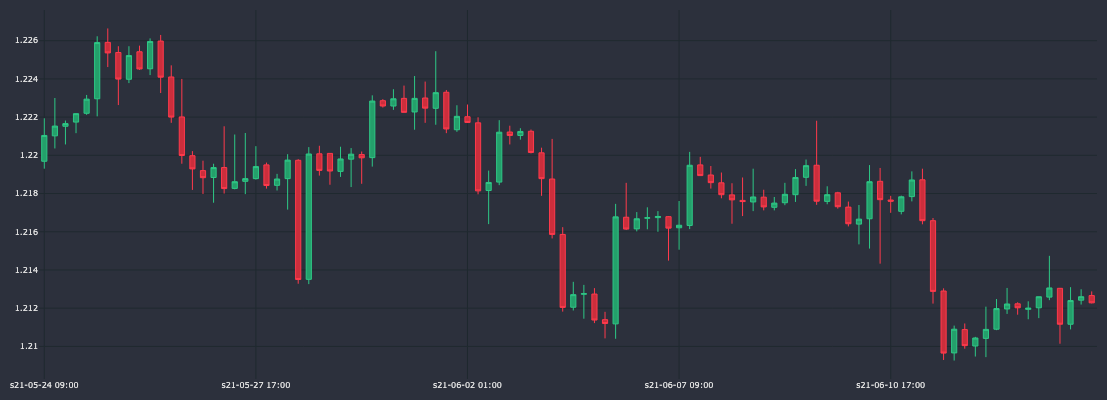

In [28]:
fig = go.Figure()
fig.add_trace(go.Candlestick(
    x=df_plot.sTime,
    open=df_plot.mid_o,
    high=df_plot.mid_h,
    low=df_plot.mid_l,
    close=df_plot.mid_c,
    line=dict(width=1), opacity=1,
    increasing_fillcolor='#24A06B',
    decreasing_fillcolor='#CC2E3C',
    increasing_line_color='#2EC886',
    decreasing_line_color='#FF3A4C'             
))

fig.update_yaxes(
    gridcolor="#1f292f"
)
fig.update_xaxes(
    gridcolor="#1f292f",
    rangeslider=dict(visible=False),
    nticks=5
)

fig.update_layout(
    width=900,
    height=400,
    margin=dict(l=10,r=10,b=10,t=10),
    paper_bgcolor="#2c303c",
    plot_bgcolor="#2c303c",
    font=dict(size=8, color="#e1e1e1")
)    

fig.show()